# Bank Marketing Prediction

# i. Introduction  
**Name:** Jenny AT  

**Problem statement:**  
The data is related with direct marketing campaigns of a Portuguese banking institution.  
The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required. 
 
**Objective:**  
This project is created to predict if clients would choose ('yes') or not ('no') subscribed to the product (bank term deposit).  
The models used for this prediction are: `Logistic Regression, KNN, SVM, Naive Bayes, Decision Tree and Random Forest`.

# ii. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Feature Engineering
from feature_engine.outliers import Winsorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
import phik
from sklearn.pipeline import Pipeline
from skfeature.function.similarity_based import fisher_score
from sklearn.feature_selection import mutual_info_classif

# Import Models
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Import CrossValidation & Tuning
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# Import Model Evaluation
from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, roc_auc_score

# Import Model Inference
import pickle

# Import warning
import warnings
warnings.filterwarnings('ignore')

# iii. Data Loading

In [2]:
# Open & Read Data Source = csv
open('bank-additional-full.csv', 'r')

# Set data as DataFrame
df_ori = pd.read_csv('bank-additional-full.csv', delimiter=';')

# Duplicate data ori
df = df_ori.copy()
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


We use delimiter during data loading because the data was displayed inappropriately, because the the CSV file uses semicolon (;) instead of a comma (,)

In [3]:
# Checking data -1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Looks like there are no missing values, let's check further:

In [4]:
print(df.isnull().sum())
print(f'{round(df.isnull().mean()*100)}%')

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age               0.0
job               0.0
marital           0.0
education         0.0
default           0.0
housing           0.0
loan              0.0
contact           0.0
month             0.0
day_of_week       0.0
duration          0.0
campaign          0.0
pdays             0.0
previous          0.0
poutcome          0.0
emp.var.rate      0.0
cons.price.idx    0.0
cons.conf.idx     0.0
euribor3m         0.0
nr.employed       0.0
y                 0.0
dtype: float64%


It's certain that there are no missing values.  
Now let's check for any data duplicates

In [5]:
# Check data duplicate
df.duplicated().sum()

12

Now drop the duplicated data

In [6]:
# Drop data duplicates
df.drop_duplicates(inplace=True)

In [7]:
# Re-check data duplicate
df.duplicated().sum()

0

Duplicated data removed successfully  

Now we also need to drop 'duration' column because it highly affects the output target (e.g., if duration=0 then y='no'),   
to make a more realistic prediction

In [8]:
# Drop 'duration' column
df.drop('duration', axis=1, inplace=True)

In [9]:
# Re-check 'duration' column drop
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

'duration' column removed successfully

# iv. Exploratory Data Analysis

# v. Data Preprocessing

### Split between X (Features/Variables) and y (Target/Label)

In [10]:
# Split X and y
X = df.drop(['y'], axis=1)

y = df['y']

print(X.columns)
print(y)

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed'],
      dtype='object')
0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41176, dtype: object


### Split train set and test set

In [11]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=70) 
X_train.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
3200,41,services,married,basic.9y,no,yes,yes,telephone,may,thu,1,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
34987,44,management,married,university.degree,no,yes,no,cellular,may,fri,1,999,1,failure,-1.8,92.893,-46.2,1.250,5099.1
13235,45,blue-collar,divorced,basic.4y,no,no,no,cellular,jul,wed,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1
26426,50,management,divorced,high.school,unknown,no,no,cellular,nov,thu,2,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8
27365,55,technician,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8


In [12]:
# Check shape
print('Train-set:',X_train.shape)
print('Test-set:',X_test.shape)

Train-set: (32940, 19)
Test-set: (8236, 19)


## a. Missing value handling

In [13]:
X_train.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [14]:
y_train.isnull().sum()

0

In [15]:
X_test.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
dtype: int64

In [16]:
y_test.isnull().sum()

0

No missing values detected

## b. Outliers Handling

In [17]:
# Detect categorical colums
X[X.select_dtypes(include=['object']).columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent
...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent


In [18]:
# Create looping to check distribution numerical dataset

num = X.select_dtypes(exclude=['object']).columns.tolist()

# Create empty list to contain column lists
normal = []
skew = []
extreme = []
for i in num:
    print(f'skewness {i}: {round(X_train[i].skew(),3)}')

    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.') 
print('skew distribution:',skew, '.') 
print(f'extreme skew distribution:{extreme}.')

skewness age: 0.775
skewness campaign: 4.807
skewness pdays: -4.951
skewness previous: 3.87
skewness emp.var.rate: -0.723
skewness cons.price.idx: -0.235
skewness cons.conf.idx: 0.298
skewness euribor3m: -0.708
skewness nr.employed: -1.045
normal distribution: ['cons.price.idx', 'cons.conf.idx'].
skew distribution: ['age', 'emp.var.rate', 'euribor3m'] .
extreme skew distribution:['campaign', 'pdays', 'previous', 'nr.employed'].


Based on the results above, the distributed columns are:  
1. Normal (-0.5 to 0.5): `cons.price.idx, cons.conf.idx`    
2. Moderately Skew (-0.5 to-1 atau 0.5 to 1): `age, emp.var.rate, euribor3m`  
3. Extreme Skew (> 1 or < -1) : `campaign, pdays, previous, nr.employed`

### Outlier checking for each distribution type

### Normal check

In [19]:
# Create function for the normal distribution
def calculate_normal_outliers(df, variable):
 
    upper_boundary = df[variable].mean() + 3 * df[variable].std()
    lower_boundary = df[variable].mean() - 3 * df[variable].std()
        
    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [20]:
# Using loop to call normal function
for i in normal:
    calculate_normal_outliers(X_train,i)
    print('')

Outlier cons.price.idx : 0
% Outlier cons.price.idx : 0.0%

Outlier cons.conf.idx : 0
% Outlier cons.conf.idx : 0.0%



There are no outliers in the normally distributed category.  
So no further handling is required.

### Skew & Extreme check

In [21]:
# Create function for skew distributed
def calculate_skewed_outliers(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    outliers = df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)]
    outliers_percentage = len(outliers) / len(df) * 100
    
    print(f'Outlier {variable} : {len(outliers)}')
    print(f'% Outlier {variable} : {round(outliers_percentage,2)}%')

In [22]:
# Using loop to call moderately skew function
for i in skew:
    calculate_skewed_outliers(X_train,i,1.5)
    print('')

Outlier age : 376
% Outlier age : 1.14%

Outlier emp.var.rate : 0
% Outlier emp.var.rate : 0.0%

Outlier euribor3m : 0
% Outlier euribor3m : 0.0%



There is an outlier for the feature 'age', since the outlier is under 5%,  
then it will be handled through trimming.

#### Extreme skew

In [23]:
# Using loop to call extreme skew function
for i in extreme:
    calculate_skewed_outliers(X_train,i,3)
    print('')

Outlier campaign : 863
% Outlier campaign : 2.62%

Outlier pdays : 1199
% Outlier pdays : 3.64%

Outlier previous : 4456
% Outlier previous : 13.53%

Outlier nr.employed : 0
% Outlier nr.employed : 0.0%



Let's check on the 'previous' column due to its outstanding number of outlier percentage

<Axes: >

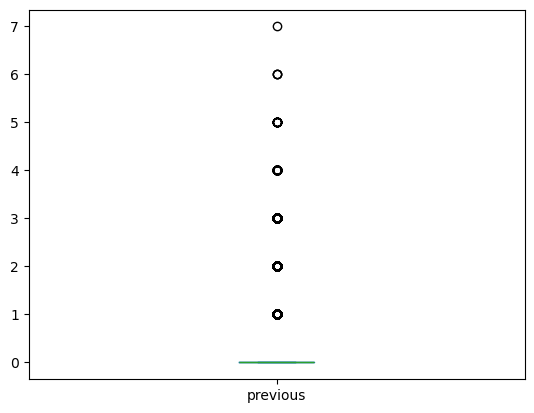

In [24]:
# Visualisasi sederhana
X_train.previous.plot(kind='box')

In [25]:
print(X_train['previous'].unique())

[0 1 2 3 4 5 6 7]


Thus, the outliers for the features 'campaign', 'pdays', and previous' will be handled with trimming.   
Even though its outlier exceeds 5%, the feature 'previous' will not be capped as it is too small in number, 

### Handling with trimming method

In [26]:
Trim_skew_features_list = ['age']
Trim_extreme_skew_features_list = ['campaign', 'pdays', 'previous']

Trim the moderately skewed distribution

In [27]:
def drop_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [28]:
for i in Trim_skew_features_list:
    drop_skew_outliers(X_train,i,1.5)

print(f'Before trim: {X_train.shape}') 

Before trim: (32564, 19)


Trim the extremely skewed distribution

In [29]:
def drop_extreme_skew_outliers(df, variable,distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    df.drop(df[(df[variable] < lower_boundary) | (df[variable] > upper_boundary)].index,inplace=True)

In [30]:
for i in Trim_extreme_skew_features_list:
    drop_extreme_skew_outliers(X_train,i,3)

print(f'Before trim: {X_train.shape}') 

Before trim: (27411, 19)


In [31]:
y_train = y_train.loc[X_train.index]

## c. Feature Selection

In [32]:
# Concat features and target to check correlation
corr = pd.concat([X_train,y_train],axis=1)
corr.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [34]:
# Check correlation
corr.phik_matrix()['y']

interval columns not set, guessing: ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


age               0.150761
job               0.125586
marital           0.079333
education         0.072338
default           0.044652
housing           0.007498
loan              0.007266
contact           0.187278
month             0.313537
day_of_week       0.010484
campaign          0.043233
emp.var.rate      0.387362
cons.price.idx    0.244686
cons.conf.idx     0.402754
euribor3m         0.402064
nr.employed       0.287038
y                 1.000000
Name: y, dtype: float64

These numbers look weak, every correlation is under 0.28.  
Keep the features that are above 0.3 = ['month', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']   
Drop the features that are under 0.1 = ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day_of_week', 'campaign', 'cons.price.idx']  
Somehow these columns: 'pdays', 'previous', 'poutcome' are not included in the matrix, so let's drop these too

In [35]:
# Drop unnecessary columns in X_train
X_train.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome','cons.price.idx'], axis=1, inplace=True)

# Drop unnecessary columns in X_test
X_test.drop(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'cons.price.idx'], axis=1, inplace=True)

In [36]:
# Check new columns
X_train.columns

Index(['month', 'emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed'], dtype='object')

## d. Split Numerical and Categorical Columns

In [37]:
# Split num col & cat col
num_col = X_train.select_dtypes(exclude=['object']).columns.tolist()
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

print(f'numerical: {num_col}')
print(f'categorical: {cat_col}')

numerical: ['emp.var.rate', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical: ['month']


## e. Cardinality Check

In [38]:
# Count unique value for each categorical columns
for i in cat_col:
    print(f'{i} : {X_train[i].nunique()}')

month : 10


This feature have a nunique lower than 11, so it is still considered to have a low cardinality.

After separating the numerical and categorical columns, we are doing scaling by using `Standard Scaler()` for the normally distributed & moderately skewed features   
and use `Robust Scaler()` for the extremely skewed features.

## f. Feature Scaling

In [39]:
# Create empty list to contain/add/fill (menyimpan) column lists
normal = []
skew = []
extreme = []
for i in num_col:
   
    if abs(round(X_train[i].skew(),3)) > 1: 
        extreme.append(i)
    elif abs(round(X_train[i].skew(),3)) > 0.5:
        skew.append(i)
    else:
        normal.append(i)

print(f'normal distribution: {normal}.')
print(f'skew distribution: {skew}.') 
print(f'extreme skew distribution:{extreme}.')

normal distribution: ['cons.conf.idx'].
skew distribution: [].
extreme skew distribution:['emp.var.rate', 'euribor3m', 'nr.employed'].


Now we split into which that will use standard scaler and which will use robust scaler

In [40]:
# Split data for standard and robust scaler first
num_col_std = ['cons.conf.idx']
num_col_rbs = ['emp.var.rate','euribor3m', 'nr.employed']

print(num_col_std)
print(num_col_rbs)

['cons.conf.idx']
['emp.var.rate', 'euribor3m', 'nr.employed']


In [41]:
# Define X_train_num
X_train_num_std = X_train[num_col_std]
X_test_num_std = X_test[num_col_std]

X_train_num_rbs = X_train[num_col_rbs]
X_test_num_rbs = X_test[num_col_rbs]

# Define scaling method
std_scaler = StandardScaler()
rbs_scaler = RobustScaler()

# Standard Scaler
std_scaler.fit(X_train_num_std)

X_train_num_std_scaled = std_scaler.transform(X_train_num_std)
X_test_num_std_scaled = std_scaler.transform(X_test_num_std)

# Robust Scaler
rbs_scaler.fit(X_train_num_rbs) 

X_train_num_rbs_scaled = rbs_scaler.transform(X_train_num_rbs)
X_test_num_rbs_scaled = rbs_scaler.transform(X_test_num_rbs)

## g. Feature Encoding

In our categorical column, since month is ordinal data, it will be encoded with `OrdinalEncoder`  
Let's take a look at the different months in this X_train.

In [42]:
print(X_train['month'].unique())

['may' 'jul' 'nov' 'jun' 'aug' 'sep' 'oct' 'apr' 'mar' 'dec']


In [44]:
# Define X_train_cat
X_train_cat = X_train[cat_col]
X_test_cat = X_test[cat_col]

# Define encoding method
encoder = OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])

# .fit_transform -> train set & .transform -> test set
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

## h. Concat

In [45]:
# concat all X_train and X_test
X_train_final = np.concatenate([X_train_num_std_scaled,X_train_num_rbs_scaled,X_train_cat_encoded, X_train_cat_encoded],axis=1)
X_test_final = np.concatenate([X_test_num_std_scaled,X_test_num_rbs_scaled,X_test_cat_encoded, X_test_cat_encoded],axis=1)
X_train_final

array([[ 9.21238990e-01,  0.00000000e+00,  1.06269926e-03,
        -1.29380054e-01,  2.00000000e+00,  2.00000000e+00],
       [-5.49062729e-01,  2.00000000e-01,  1.09458023e-01,
         8.70619946e-01,  4.00000000e+00,  4.00000000e+00],
       [-3.85695872e-01, -8.00000000e-01, -8.32093518e-01,
         0.00000000e+00,  8.00000000e+00,  8.00000000e+00],
       ...,
       [-3.85695872e-01, -8.00000000e-01, -7.85334750e-01,
         0.00000000e+00,  8.00000000e+00,  8.00000000e+00],
       [ 9.91253358e-01,  2.00000000e-01,  1.10520723e-01,
         8.70619946e-01,  5.00000000e+00,  5.00000000e+00],
       [ 9.91253358e-01,  2.00000000e-01,  1.10520723e-01,
         8.70619946e-01,  5.00000000e+00,  5.00000000e+00]])

In [46]:
# (opsional) di rubah dalam bentuk dataframe
X_train_final_df = pd.DataFrame(X_train_final)
X_train_final_df

,0,1,2,3,4,5
0,0.921239,0.0,0.001063,-0.12938,2.0,2.0
1,-0.549063,0.2,0.109458,0.87062,4.0,4.0
2,-0.385696,-0.8,-0.832094,0.00000,8.0,8.0
3,-0.385696,-0.8,-0.890542,0.00000,8.0,8.0
4,-0.385696,-0.8,-0.785335,0.00000,8.0,8.0
...,...,...,...,...,...,...
27406,-0.549063,0.2,0.105207,0.87062,4.0,4.0
27407,0.991253,0.2,0.110521,0.87062,5.0,5.0
27408,-0.385696,-0.8,-0.785335,0.00000,8.0,8.0
27409,0.991253,0.2,0.110521,0.87062,5.0,5.0


# vi. Model Definition

In [47]:
def initialize_classifiers():
    classifiers = []

    
    # Add Logistic Regression
    model1 = LogisticRegression()
    classifiers.append(model1)

    # Add SVM
    model2 = SVC()
    classifiers.append(model2)

    # Add KNN
    model3 = KNeighborsClassifier()
    classifiers.append(model3)

    # Add Naive Bayes
    model4 = GaussianNB()
    classifiers.append(model4)

    # Add Decision Tree
    model5 = DecisionTreeClassifier()
    classifiers.append(model5)

    # Add Random Forest
    model6 = RandomForestClassifier()
    classifiers.append(model6)

    return classifiers

# Usage example:
classifiers = initialize_classifiers()
print(classifiers)

[LogisticRegression(), SVC(), KNeighborsClassifier(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]


In [48]:
for clf in classifiers:
    clf.fit(X_train_final, y_train)
    y_pred= clf.predict(X_test_final)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(clf, acc))
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix of %s is %s"%(clf, cm))

Accuracy of LogisticRegression() is 0.891452161243322
Confusion Matrix of LogisticRegression() is [[7342    0]
 [ 894    0]]
Accuracy of SVC() is 0.8915735794074794
Confusion Matrix of SVC() is [[7305   37]
 [ 856   38]]
Accuracy of KNeighborsClassifier() is 0.8927877610490529
Confusion Matrix of KNeighborsClassifier() is [[7162  180]
 [ 703  191]]
Accuracy of GaussianNB() is 0.7190383681398738
Confusion Matrix of GaussianNB() is [[5288 2054]
 [ 260  634]]
Accuracy of DecisionTreeClassifier() is 0.8929091792132103
Confusion Matrix of DecisionTreeClassifier() is [[7238  104]
 [ 778  116]]
Accuracy of RandomForestClassifier() is 0.8920592520641087
Confusion Matrix of RandomForestClassifier() is [[7202  140]
 [ 749  145]]


Based on the result above, the `DecisionTree` is the most accurate one.

# vii. Model Training

In [53]:
# Feature scaling and encoding in column transformer
std_scaler = StandardScaler()
rbs_scaler = RobustScaler()
encoder = OrdinalEncoder(categories=[['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']])

preprocess = ColumnTransformer(
    transformers= [
        ('standard', std_scaler, num_col_std),
        ('robust', rbs_scaler, num_col_rbs),
        ('categorical', encoder, cat_col)
        ], 
    remainder='passthrough'
)

In [54]:
pipe_dt = make_pipeline(preprocess, DecisionTreeClassifier(random_state=70))

In [55]:
pipe_dt

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['cons.conf.idx']),
                                                 ('robust', RobustScaler(),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  OrdinalEncoder(categories=[['mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec']]),
                                                  ['month'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=70))])

In [56]:
# Train best model
pipe_dt.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standard', StandardScaler(),
                                                  ['cons.conf.idx']),
                                                 ('robust', RobustScaler(),
                                                  ['emp.var.rate', 'euribor3m',
                                                   'nr.employed']),
                                                 ('categorical',
                                                  OrdinalEncoder(categories=[['mar',
                                                                              'apr',
                                                                              'may',
                                                                              'jun',
                                                                              'jul',
                                                                              'aug',
                                                                              'sep',
                                                                              'oct',
                                                                              'nov',
                                                                              'dec']]),
                                                  ['month'])])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=70))])

In [57]:
# Evaluate model DT
y_pred_train = pipe_dt.predict(X_train)
y_pred_test = pipe_dt.predict(X_test)

# Print classification report
print(f'Decision Tree - Train - Before Tuning')
print(f'{classification_report(y_train, y_pred_train)}')
print('')
print(f'Decision Tree - Test - Before Tuning')
print(f'{classification_report(y_test, y_pred_test)}')

Decision Tree - Train - Before Tuning
              precision    recall  f1-score   support

          no       0.92      0.99      0.96     24991
         yes       0.70      0.13      0.22      2420

    accuracy                           0.92     27411
   macro avg       0.81      0.56      0.59     27411
weighted avg       0.90      0.92      0.89     27411


Decision Tree - Test - Before Tuning
              precision    recall  f1-score   support

          no       0.90      0.99      0.94      7342
         yes       0.53      0.13      0.21       894

    accuracy                           0.89      8236
   macro avg       0.72      0.56      0.58      8236
weighted avg       0.86      0.89      0.86      8236



Text(0.5, 1.0, 'Before Tuning-test')

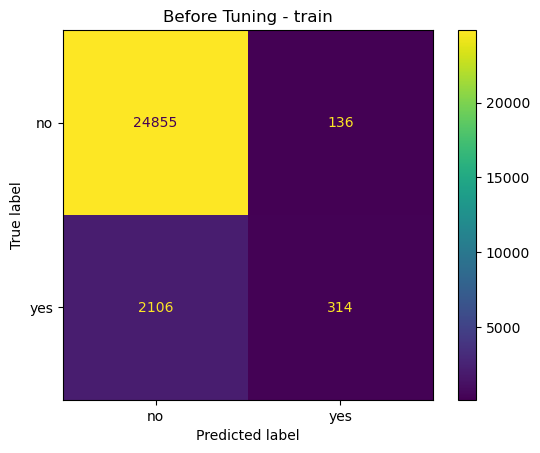

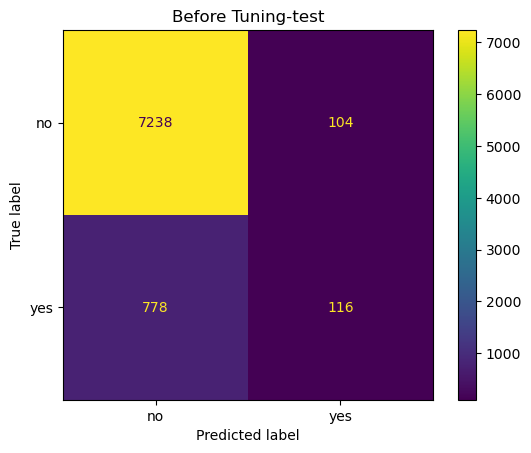

In [58]:
# Check False Negative and False Positive
cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_dt.classes_)
cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_dt.classes_)

disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=pipe_dt.classes_)
disp_train.plot()
plt.title('Before Tuning - train')

disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=pipe_dt.classes_)
disp_test.plot()
plt.title('Before Tuning-test')

In [59]:
# create function to table reports recap
all_reports = {}
def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    # calculate f1-score
    train_f1=f1_score(y_train,y_pred_train)
    test_f1=f1_score(y_test,y_pred_test)

    # calculate fp fn
    cm_train = confusion_matrix(y_train, y_pred_train, labels=pipe_dt.classes_)
    cm_test = confusion_matrix(y_test, y_pred_test, labels=pipe_dt.classes_)

    # extract FP FN
    fn_train = cm_train[1,0]
    fp_train = cm_train[0,1]
    fn_test = cm_test[1,0]
    fp_test = cm_test[0,1]


    # create dictionary
    score_reports = {
        'train-f1score':train_f1,
        'test-f1score':test_f1,
        'train-fn':fn_train,
        'test-fn': fn_test,
        'train-fp': fp_train,
        'test-fp':fp_test
    }

    # add reports
    all_reports[name] = score_reports
    return all_reports 


In [61]:
all_reports = performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, 'Before Tuning')
pd.DataFrame(all_reports)

ValueError: pos_label=1 is not a valid label. It should be one of ['no', 'yes']